In [5]:
# configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing the dogs vs cats dataset from kaggle

In [6]:
# kaggle api
!kaggle competitions download -c dogs-vs-cats

 99% 806M/812M [00:10<00:00, 143MB/s]
100% 812M/812M [00:10<00:00, 84.5MB/s]


In [7]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [8]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset ='/content/dogs-vs-cats.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset has been extracted')

The dataset has been extracted


In [9]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset ='/content/train.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset has been extracted')

The dataset has been extracted


In [10]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print("Number of images: ", file_count)

Number of images:  25000


Printing the name of images

In [11]:
file_names = os.listdir('/content/train')
print(file_names)

['cat.9366.jpg', 'dog.12082.jpg', 'dog.7194.jpg', 'dog.6082.jpg', 'dog.9178.jpg', 'dog.5440.jpg', 'dog.8137.jpg', 'cat.7773.jpg', 'cat.10451.jpg', 'cat.10274.jpg', 'dog.10452.jpg', 'cat.11018.jpg', 'dog.5701.jpg', 'dog.11165.jpg', 'dog.10390.jpg', 'cat.10808.jpg', 'dog.2596.jpg', 'dog.11415.jpg', 'dog.3702.jpg', 'cat.5193.jpg', 'dog.4462.jpg', 'dog.12384.jpg', 'dog.11160.jpg', 'dog.9799.jpg', 'dog.2812.jpg', 'cat.12360.jpg', 'dog.1483.jpg', 'cat.10317.jpg', 'dog.9942.jpg', 'cat.5164.jpg', 'dog.5453.jpg', 'dog.3132.jpg', 'cat.9517.jpg', 'dog.7537.jpg', 'cat.7799.jpg', 'dog.8778.jpg', 'dog.2189.jpg', 'dog.3308.jpg', 'dog.7542.jpg', 'dog.8722.jpg', 'dog.11033.jpg', 'dog.2612.jpg', 'cat.987.jpg', 'cat.6953.jpg', 'cat.9556.jpg', 'dog.8820.jpg', 'cat.12119.jpg', 'cat.6658.jpg', 'dog.3470.jpg', 'cat.12128.jpg', 'dog.2446.jpg', 'cat.5741.jpg', 'cat.5114.jpg', 'cat.7458.jpg', 'cat.1324.jpg', 'cat.1271.jpg', 'dog.10612.jpg', 'dog.5647.jpg', 'cat.7055.jpg', 'dog.10702.jpg', 'dog.77.jpg', 'cat.117

Importing the Dependencies

In [12]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying the images of dogs and cats

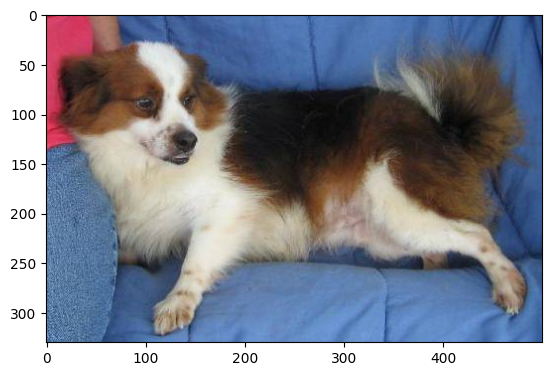

In [13]:
# display dog image
img = mpimg.imread('/content/train/dog.12082.jpg')
imgplt = plt.imshow(img)
plt.show()

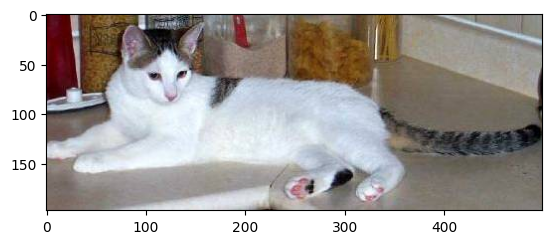

In [14]:
# display cat image
img = mpimg.imread('/content/train/cat.9366.jpg')
imgplt = plt.imshow(img)
plt.show()

In [15]:
file_names = os.listdir('/content/train/')

for i in range(5):

  name = file_names[i]
  print(name[0:3])

cat
dog
dog
dog
dog


In [16]:
dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print("Cats: ", cat_count)
print("Dogs: ", dog_count)

Cats:  12500
Dogs:  12500


Resizing all the images

In [17]:
# creating a directory for resized images
os.mkdir('/content/image resized')

In [18]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):
  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert('RGB')

  newImgPath = resized_folder + filename
  img.save(newImgPath)

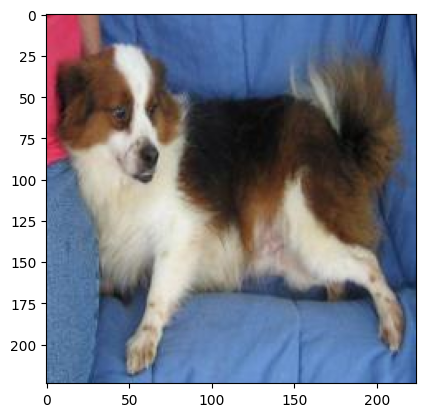

In [19]:
# displaying resized image of dog
img = mpimg.imread('/content/image resized/dog.12082.jpg')
imgplt = plt.imshow(img)
plt.show()

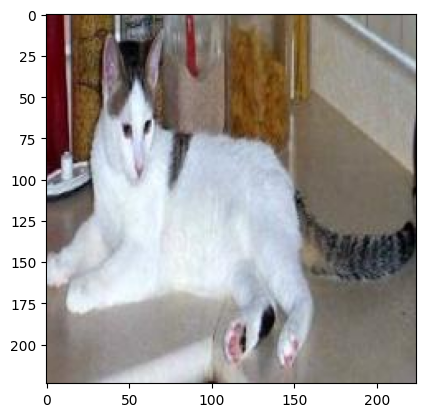

In [20]:
# display resized cat image
img = mpimg.imread('/content/image resized/cat.9366.jpg')
imgplt = plt.imshow(img)
plt.show()

**Creating labels for resized images of dogs and cats**

Cat --> 0

Dog --> 1

In [21]:
# Creating loop to assign labels
filename = os.listdir('/content/image resized/')

labels=[]

for i in range(2000):

  file_name = filename[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)
  else:
    labels.append(0)

In [22]:
print(labels[0:5])

[0, 1, 1, 1, 1]


In [23]:
# counting images of dogs and cats in the resized images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 982 1018]


Converting all the resized images to numpy arrays

In [24]:
import cv2
import glob

In [25]:
image_directory = '/content/image resized/'
image_extension = ['jpg', 'png']

files = []

[files.extend(glob.glob(image_directory + '*.'+e)) for e in image_extension]

dog_cat_images = np.array([cv2.imread(file) for file in files])

In [27]:
X = dog_cat_images
Y = np.asarray(labels)

Train Test Split

In [28]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2, random_state=2)

In [29]:
print(X.shape, x_train.shape, x_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 training images

400 test images

In [30]:
# scaling the data
x_train_scaled = x_train/255
x_test_scaled = x_test/255

Building the Neural Network

In [31]:
import tensorflow as tf
import tensorflow_hub as hub

In [32]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape = (224,224,3), trainable= False)


In [34]:
num_of_classes = 2

model= tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [36]:
model.compile(

              optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['acc']
)

In [38]:
model.fit(x_train_scaled, y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 78s 1s/step - loss: 0.2050 - acc: 0.9200
Epoch 2/5
50/50 [==============================] - 70s 1s/step - loss: 0.0730 - acc: 0.9744
Epoch 3/5
50/50 [==============================] - 69s 1s/step - loss: 0.0520 - acc: 0.9837
Epoch 4/5
50/50 [==============================] - 72s 1s/step - loss: 0.0421 - acc: 0.9869
Epoch 5/5
50/50 [==============================] - 68s 1s/step - loss: 0.0335 - acc: 0.9912


In [39]:
score, acc = model.evaluate(x_test_scaled, y_test)

13/13 [==============================] - 18s 1s/step - loss: 0.0561 - acc: 0.9825


**Predictive System**

Path of the image to be predicted: /content/dog.jpeg


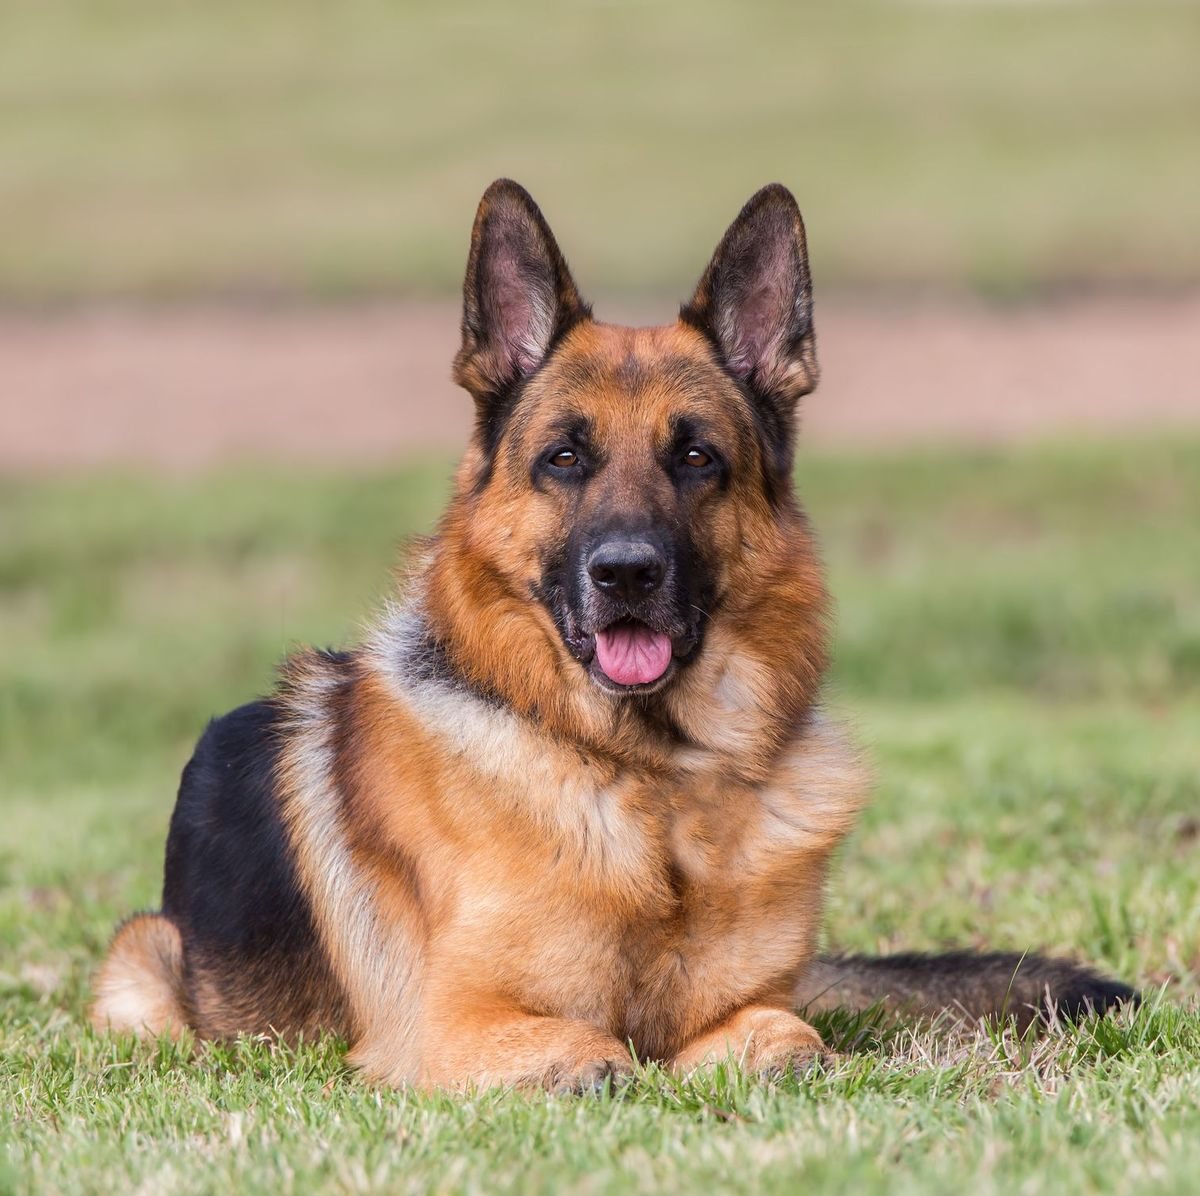

1/1 [==============================] - 0s 90ms/step
The image represents a dog!


In [42]:
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

image_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(image_prediction)

if input_pred_label == 0:
  print('The image represents a cat!')
else:
  print("The image represents a dog!")
